In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np 
from myutils import Helpers as h
from myutils import Complexity_Measures as cm
from sklearn.decomposition import PCA

Magic Command, so changes in myutils module are reloaded

In [2]:
%load_ext autoreload
%autoreload 1
%aimport myutils

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Explore Data

In [4]:
print(len(x_train),"training samples")
print(len(x_test),"test samples")

60000 training samples
10000 test samples


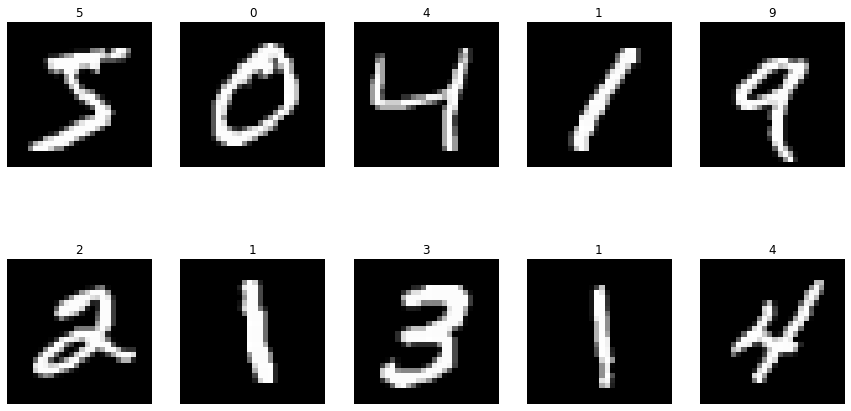

In [5]:
rows = 2
cols = 5

h.plot_grid(rows=2,cols=5,data=x_train,labels=y_train)

# 1. Build Datasets
## 1.1 Controll Dataset: random noise -> expected to have the greates complexity

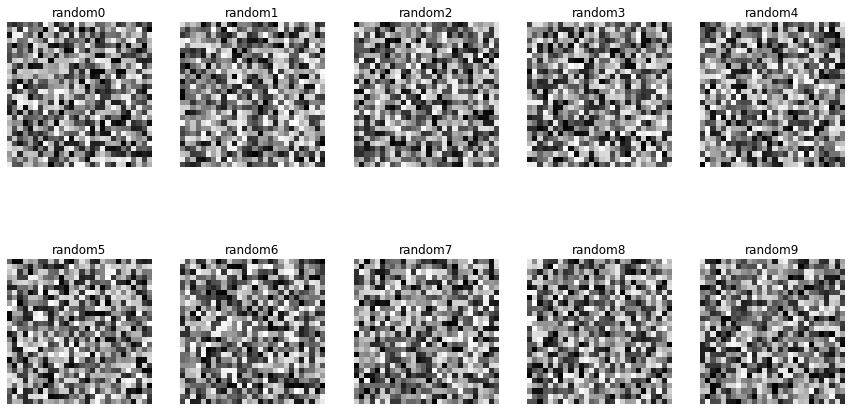

In [44]:
random = np.array([np.random.rand(x_train[0].shape[0],x_train[0].shape[1]) * 255 for _ in range(4000)]).astype(int)
random_l = ["random"+str(i) for i in range(4000)]
h.plot_grid(rows=2,cols=5,data=random,labels=random_l)

## 1.1 Only Take 6 and 9
Expected to have lower complexity than random and all numbers

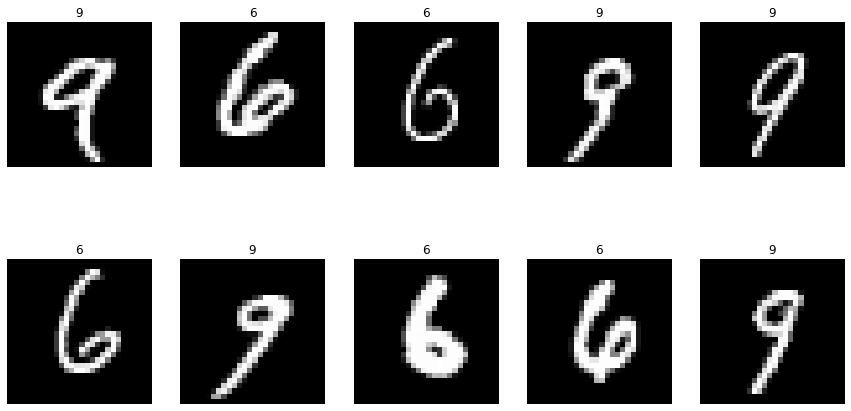

In [7]:
six_nine_index = [i for i in range(len(x_train)) if y_train[i] in [6,9]]
six_nine_x = np.array([x_train[i] for i in six_nine_index])
six_nine_y = np.array([y_train[i] for i in six_nine_index])

h.plot_grid(rows=2,cols=5,data=six_nine_x,labels=six_nine_y)

# Test classification to be performed only with the result of the PCA.

On the test plot you can see that it seems that the 6s and 9s always look about the same. For the classification the simplest possibility was used: if the pixel in the upper left corner is white -> 6 otherwise 9. This gives a surprisingly good accuracy of 82%.

-> thus the assumption that the variational_circuit does not "perform" so much or has to solve an already simple problem.

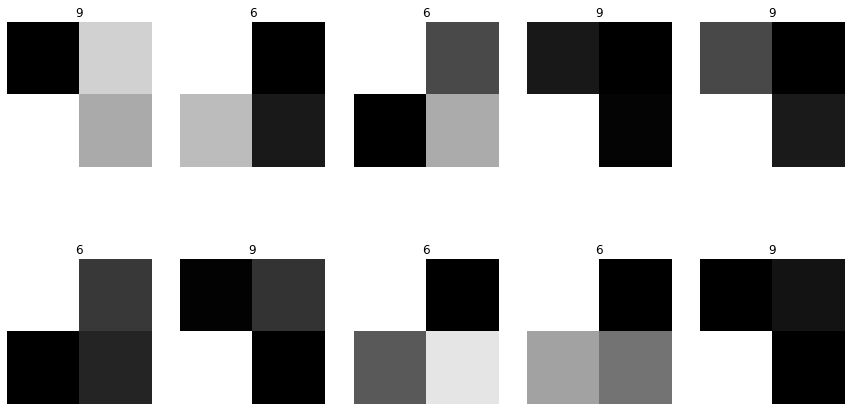

In [8]:
six_nine_pca = h.PCA(six_nine_x, n_components=4)

h.plot_grid(six_nine_pca,labels=six_nine_y)


Normalize values between 0 and 255, because PCA moves value range

In [9]:
six_nine_pca_normalized = h.normalize(six_nine_pca)

In [10]:
predictions = list()
for i in range(len(six_nine_pca)):
    if six_nine_pca_normalized[i][0][0] > 150:
        predictions.append(6)
    else:
        predictions.append(9)

Accurracy 0.8273363107777871


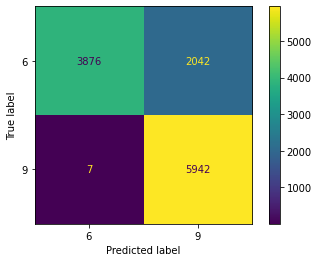

In [11]:
h.plot_classify_results(predictions=predictions,labels=six_nine_y)

## 1.2 only take 6
expected to have the lowest complexity

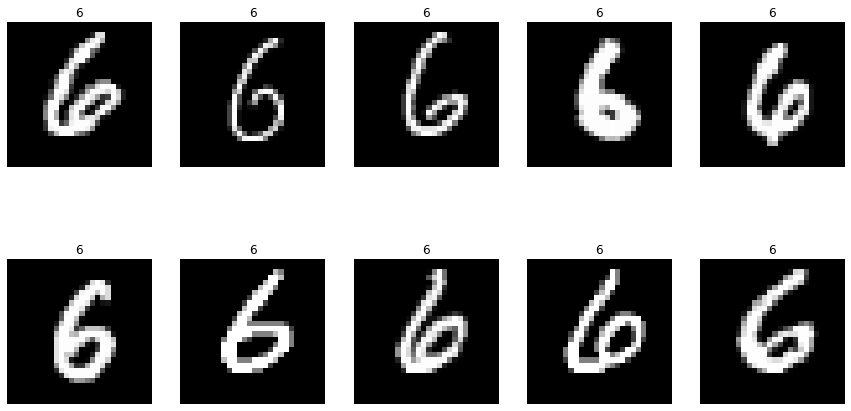

In [12]:
only_6_index = [i for i in range(len(x_train)) if y_train[i] == 6]
only_6_x = np.array([x_train[i] for i in only_6_index])
only_6_y = np.array([y_train[i] for i in only_6_index])
h.plot_grid(rows=2,cols=5,data=only_6_x,labels=only_6_y)

Structure of PCA results are a little bit dissapointing, i would have hoped that PCA result look more alike, since the starting images are pretty similar

**=> a hint that PCA is maybe not the best method for downscaling the images**

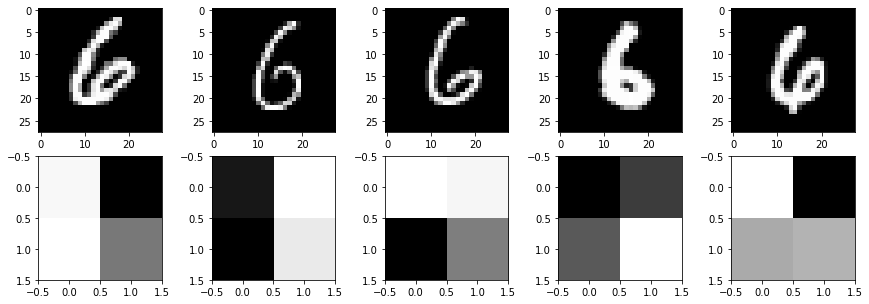

In [13]:
only_6_pca = h.PCA(only_6_x, n_components=4)

_, ax = plt.subplots(2,5,figsize=(15,5))
i=0
for index in range(5): 
    ax[0,i].imshow(only_6_x[index],cmap="gray")
    ax[1,i].imshow(only_6_pca[index],cmap="gray")
    i+=1

# Entropy Measure
For each created dataset, take 4000 random samples (since dataset sizes are not equal -> all numbers > six&nines > only sixes). Calculate the entropy like proposed in paper below.
  
Like expected the random dataset gets the largest entropy. But the other dataset aren't to different from each other, which ist not what our hope was (Because the dataset with all numbers is cleary more "complex" than the dataset with only sixes). Especially the six&nine dataset get a slightly lower entropy than only sixes.
  
Also the entropy for all pixels get plotet.



*Rahane, A. A., & Subramanian, A. (2020). Measures of Complexity for Large Scale Image Datasets. 2020 International Conference on Artificial Intelligence in Information and Communication (ICAIIC), 282–287. https://doi.org/10.1109/ICAIIC48513.2020.9065274*

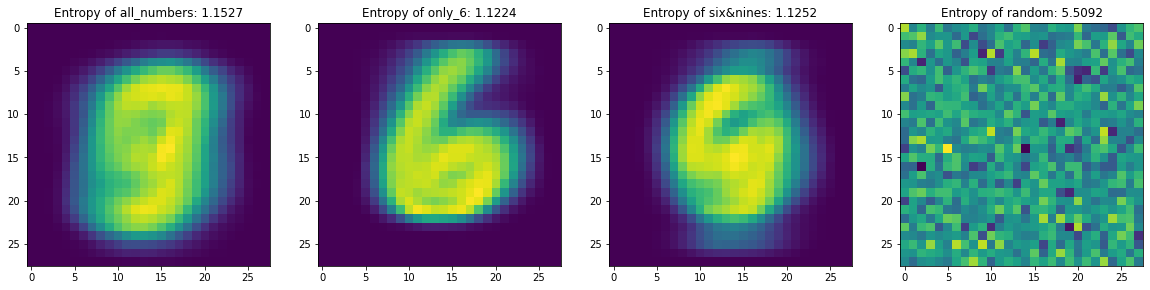

In [45]:
datasets = {
    "all_numbers": x_train,
    "only_6": only_6_x,
    "six&nines": six_nine_x,
    "random": random
}

fig, ax = plt.subplots(1,4,figsize=(20,10))
i = 0

for dataset in datasets:
    d_set = datasets[dataset]
    np.random.shuffle(d_set)
    np.random.seed(1337)
    d_set = d_set[:4000]

    entropy = cm.entropy(d_set)

    ax[i].set_title("Entropy of {}: {:.4f}".format(dataset, entropy.mean()))
    
    ax[i].imshow(entropy.reshape(d_set.shape[1], d_set.shape[2]),cmap="viridis")
    i+=1

plt.show()

    


Man sieht dass alle 3 datasets nach der Anwendung der PCA ungefähr eine gleich-hohe Entropie aufweisen. Das bedeutet entweder is PCA ungeeignet oder Entropie.

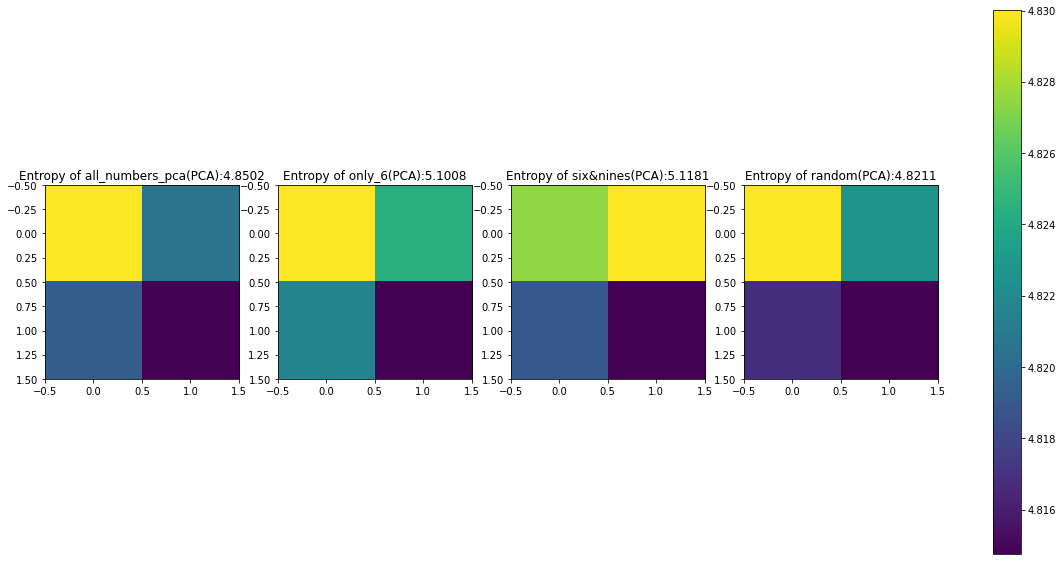

In [47]:
all_numbers_pca = h.PCA(x_train, n_components=4)
random_pca = h.PCA(random, n_components=4)

datasets = {
    "all_numbers_pca": all_numbers_pca,
    "only_6": only_6_pca,
    "six&nines": six_nine_pca,
    "random": random_pca
}

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
i = 0

for dataset in datasets:
    d_set = datasets[dataset]
    # the data is normalized in the range 0-255
    d_set = h.normalize(d_set)
    entropy_pca = cm.entropy(d_set)
    ax[i].set_title("Entropy of {}(PCA):{:.4f}".format(dataset, entropy_pca.mean()))

    im = ax[i].imshow(entropy_pca.reshape(2,2))
    i += 1
fig.colorbar(im, ax=ax)
plt.show()
